<a href="https://colab.research.google.com/github/ladyj-dev/Wine_All_You_Want/blob/main/pdwine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Filtering Data

In [1]:
import os
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.1'
spark_version = 'spark-3.0.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done


In [2]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("wineFunctions").getOrCreate()

In [3]:
from pyspark import SparkFiles
url ="https://winedata150k.s3.us-east-2.amazonaws.com/winemag-data_first150k.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("winemag-data_first150k.csv"), sep=",", header=True)

# Show DataFrame
df.show()

+---+-------+--------------------+--------------------+------+-----+------------------+--------------------+-----------------+------------------+--------------------+
|_c0|country|         description|         designation|points|price|          province|            region_1|         region_2|           variety|              winery|
+---+-------+--------------------+--------------------+------+-----+------------------+--------------------+-----------------+------------------+--------------------+
|  0|     US|This tremendous 1...|   Martha's Vineyard|    96|235.0|        California|         Napa Valley|             Napa|Cabernet Sauvignon|               Heitz|
|  1|  Spain|Ripe aromas of fi...|Carodorum Selecci...|    96|110.0|    Northern Spain|                Toro|             null|     Tinta de Toro|Bodega Carmen Rod...|
|  2|     US|Mac Watson honors...|Special Selected ...|    96| 90.0|        California|      Knights Valley|           Sonoma|   Sauvignon Blanc|            Macauley

In [4]:
import pandas as pd
pandas_df = df.toPandas()
pandas_df

,_c0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,None,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,None,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150930,150925,Italy,Many people feel Fiano represents southern Ita...,None,91,20.0,Southern Italy,Fiano di Avellino,None,White Blend,Feudi di San Gregorio
150931,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,None,Champagne Blend,H.Germain
150932,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,None,White Blend,Terredora
150933,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,None,Champagne Blend,Gosset


began my analysis

In [5]:
wine_df = pandas_df.copy()
wine_df

,_c0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,None,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,None,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150930,150925,Italy,Many people feel Fiano represents southern Ita...,None,91,20.0,Southern Italy,Fiano di Avellino,None,White Blend,Feudi di San Gregorio
150931,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,None,Champagne Blend,H.Germain
150932,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,None,White Blend,Terredora
150933,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,None,Champagne Blend,Gosset


In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150935 entries, 0 to 150934
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   _c0          150935 non-null  object
 1   country      150930 non-null  object
 2   description  150934 non-null  object
 3   designation  105202 non-null  object
 4   points       150929 non-null  object
 5   price        137238 non-null  object
 6   province     150924 non-null  object
 7   region_1     125876 non-null  object
 8   region_2     60972 non-null   object
 9   variety      150929 non-null  object
 10  winery       150918 non-null  object
dtypes: object(11)
memory usage: 12.7+ MB


In [7]:
wine_df.dtypes

_c0            object
country        object
description    object
designation    object
points         object
price          object
province       object
region_1       object
region_2       object
variety        object
winery         object
dtype: object

In [8]:
wine_df["variety"].value_counts()

Chardonnay                  14480
Pinot Noir                  14287
Cabernet Sauvignon          12792
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Pardina                         1
Cabernet Moravia                1
Moscatel de Alejandría          1
Sarba                           1
Altesse                         1
Name: variety, Length: 656, dtype: int64

In [9]:
wine_df["country"].value_counts()

US                                                                                          62397
Italy                                                                                       23478
France                                                                                      21098
Spain                                                                                        8268
Chile                                                                                        5816
Argentina                                                                                    5631
Portugal                                                                                     5322
Australia                                                                                    4957
New Zealand                                                                                  3320
Austria                                                                                      3057
Germany             

In [10]:
wine_df["points"].value_counts()

87                                                                                                                                                                 20743
88                                                                                                                                                                 17867
90                                                                                                                                                                 15970
86                                                                                                                                                                 15569
89                                                                                                                                                                 12918
85                                                                                                                                                         

In [11]:
wine_df["price"].value_counts()

20.0      7860
15.0      7055
18.0      5987
25.0      5954
30.0      5449
          ... 
848.0        1
530.0        1
525.0        1
1000.0       1
1900.0       1
Name: price, Length: 381, dtype: int64

In [12]:
wine_df["price"].value_counts(ascending=False)

20.0      7860
15.0      7055
18.0      5987
25.0      5954
30.0      5449
          ... 
848.0        1
530.0        1
525.0        1
1000.0       1
1900.0       1
Name: price, Length: 381, dtype: int64

In [13]:
wine_df.columns

Index(['_c0', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [20]:
# Transform columns price and points into integers
wine_df['price'] = pd.to_numeric(wine_df['price'],errors='coerce')

In [23]:
# Transform points from string to float
wine_df['points'] = pd.to_numeric(wine_df['points'],errors='coerce')

In [26]:
# Transform designation as a catergory
wine_df['designation'].astype('category')

0                            Martha's Vineyard
1         Carodorum Selección Especial Reserva
2                Special Selected Late Harvest
3                                      Reserve
4                                   La Brûlade
                          ...                 
150930                                     NaN
150931                          Cuvée Prestige
150932                           Terre di Dora
150933                         Grand Brut Rosé
150934                                     NaN
Name: designation, Length: 150935, dtype: category
Categories (30642, object): [' Riesling offers up intense honey', ' and at this point not showing much fruit or ...,
                             ' and this wine seems to have been a victim. A..., ' and top it all off with a metropolis-at-nigh...,
                             ..., 'ía', 'ía Crianza', 'Župska', '‘Rough Justice' Red']

In [27]:
wine_df.dtypes

_c0             object
country         object
description     object
designation     object
points         float64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [22]:
wine_df


,_c0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,None,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,None,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150930,150925,Italy,Many people feel Fiano represents southern Ita...,None,91,20.0,Southern Italy,Fiano di Avellino,None,White Blend,Feudi di San Gregorio
150931,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,None,Champagne Blend,H.Germain
150932,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,None,White Blend,Terredora
150933,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,None,Champagne Blend,Gosset


In [28]:
wine_df.describe()

,points,price
count,150897.000000,137206.000000
mean,87.886770,33.131029
std,3.239355,36.324959
min,8.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82dd94f1d0>,
      dtype=object)

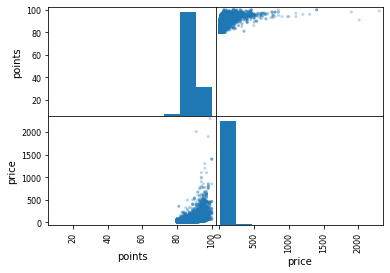

In [29]:
pd.plotting.scatter_matrix(wine_df, alpha=0.3)

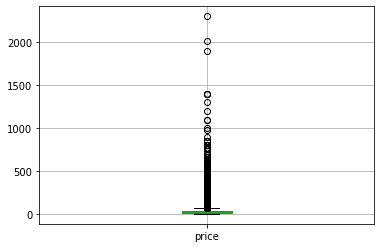

In [35]:
# visualize price distribution
wine_df.boxplot(column=['price'])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


{'boxes': [<matplotlib.lines.Line2D at 0x7f82dd44c860>],
 'caps': [<matplotlib.lines.Line2D at 0x7f82dd0472b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f82dd047d30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f82dd0479b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f82dd44cb70>,
  <matplotlib.lines.Line2D at 0x7f82dd44cef0>]}

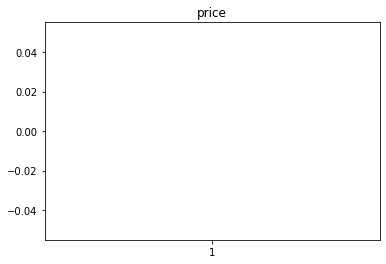

In [39]:
fig1, ax1 = plt.subplots()
ax1.set_title('price')
ax1.boxplot(wine_df['price'])